Paliwo: CH4 , LHV: 50.026 MJ/kg, HHV: 55.512 MJ/kg
Paliwo: CH4 , LHV: 49.965 MJ/kg, HHV: 54.868 MJ/kg
Paliwo: CH4 , LHV: 49.886 MJ/kg, HHV: 52.521 MJ/kg
Paliwo: C3H8 , LHV: 46.352 MJ/kg, HHV: 50.344 MJ/kg
Paliwo: C3H8 , LHV: 46.352 MJ/kg, HHV: 50.344 MJ/kg
Paliwo: C3H8 , LHV: 46.304 MJ/kg, HHV: 49.872 MJ/kg
Paliwo: H2 , LHV: 119.959 MJ/kg, HHV: 141.788 MJ/kg
Paliwo: H2 , LHV: 119.959 MJ/kg, HHV: 141.788 MJ/kg
Paliwo: H2 , LHV: 120.469 MJ/kg, HHV: 139.980 MJ/kg


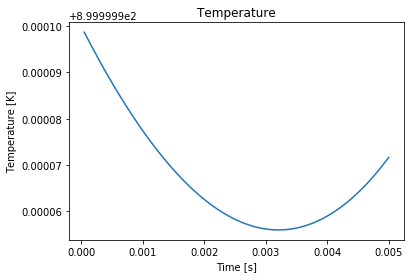

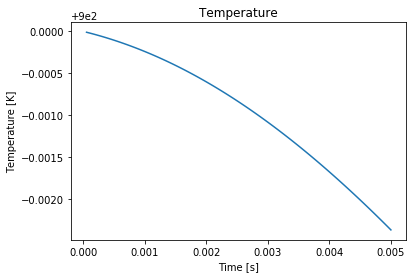

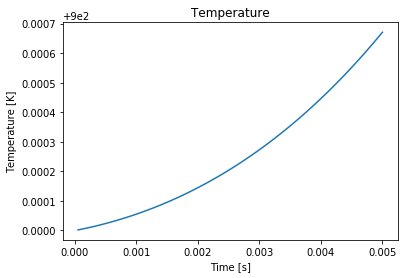

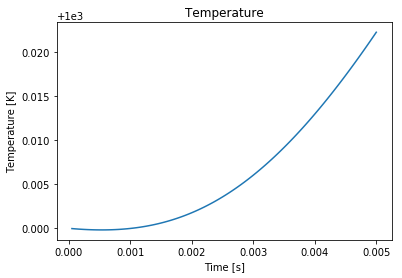

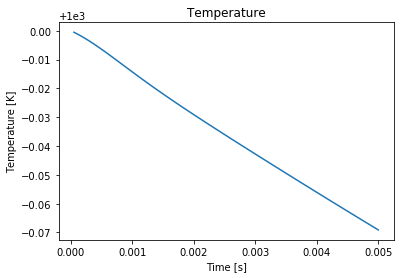

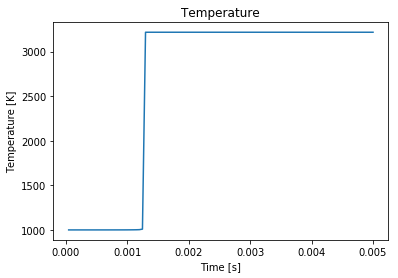

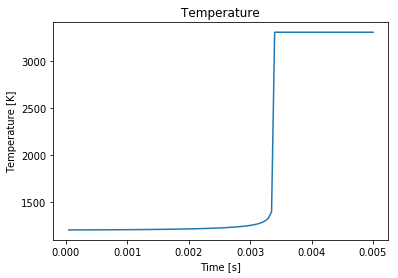

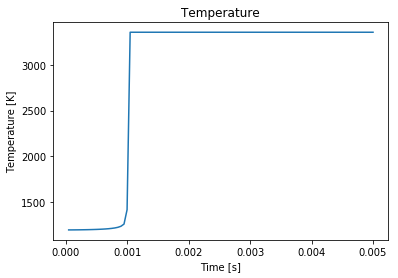

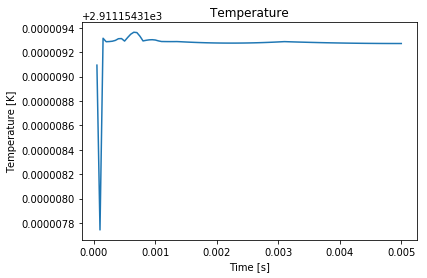

In [46]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import sys

##Deklaracja mieszanin mechanizmem giri30

mieszanina= ct.Solution('gri30.cti')
produkty = ct.Solution('gri30.cti')
gas = ct.Solution('gri30.cti')
mieszanina_1 = ct.Solution('gri30.xml')
mieszanina_2 = ct.Solution('gri30.xml')
mieszanina_3 = ct.Solution('gri30.xml')

def cieplo (mieszanka, T, p):                     ## Funkcja wyliczająca Ciepło spalania paliwa LHV i HHV
    
    woda = ct.Water()
    woda.TX = T, 0
    h_ciecz = woda.h
    woda.TX = T, 1
    h_gas= woda.h
    
    mieszanina.TP = T, p
    mieszanina.set_equivalence_ratio(1.0, mieszanka, 'O2:1.0')
    h1 = mieszanina.enthalpy_mass
    S_mieszanka = mieszanina[mieszanka].Y[0]
    
    S_products = {'CO2': mieszanina.elemental_mole_fraction('C'),
                  'H2O': 0.5 * mieszanina.elemental_mole_fraction('H'),
                  'N2': 0.5 * mieszanina.elemental_mole_fraction('N')}
    produkty.TPX = T,p, S_products
    S_H2O = produkty['H2O'].Y[0]
    h2 = produkty.enthalpy_mass
    LV = -(h2-h1)/S_mieszanka
    HV = -(h2-h1 + (h_ciecz-h_gas) * S_H2O)/S_mieszanka
    LV=LV/1000000
    HV=HV/1000000
    print ('Paliwo: %s , LHV: %.3f MJ/kg, HHV: %.3f MJ/kg' %(mieszanka, LV, HV))

def temp (m):                                 ## Funkcja wyliczająca temperature spalania w czasie 
    wyniki = open('wyniki_mkws.txt', 'w')
    wyniki.write('%5s\t%10s\t%10s\n' % ('L.p.', 't [s]', 'T [K]'))

    r = ct.IdealGasConstPressureReactor(m)

    sim = ct.ReactorNet([r])
    time = 0.0
    states = ct.SolutionArray(m, extra=['t'])

    ##print('%10s %10s' % ('t [s]','T [K]'))
    for n in range(100):
        time += 0.00005
        sim.advance(time)
        states.append(r.thermo.state, t=time)
        ##print('%5d %10.3f %10.3f' % (n,time, r.T))
    wyniki.close()
    ##print (r.kinetics.n_reactions)
#print (states.u)
#matplotlib
    plt.figure()
    plt.plot(states.t, states.T)
    plt.xlabel('Time [s]')
    plt.ylabel('Temperature [K]')
    plt.title('Temperature')

## deklaracja warunków początkowych 1,2 i 3

T1=298
p1=101325
T2=400
p2=1.5*p1
T3=600
p3=3*p1

## deklaracja mieszaniny_1 metanu z tlenem

mieszanina_1.TPX = 1000,p1, 'CH4:1, O2:2'

## wyliczenie ciepła spalania dla 3 różnych warunków początkowych
cieplo('CH4',T1,p1)
cieplo('CH4',T2,p2)
cieplo('CH4',T3,p3)



## deklaracja mieszaniny_2 propanu z tlenem 
mieszanina_2.TPX = 1000, p1, 'C3H8:1, O2:5'

cieplo('C3H8',T1,p1)
cieplo('C3H8',T1,p1)
cieplo('C3H8',T2,p2)



## deklaracja mieszaniny_3 wodoru z tlenem 
mieszanina_3.TPX = T1, p1, 'H2:2, O2:1'

cieplo('H2',T1,p1)
cieplo('H2',T1,p1)
cieplo('H2',T2,p2)

## Wyliczenie temperatury spalania na podstawie reaktora o stałym ciśnieniu oraz przedstawienie wyników na wykresie

T1=900
p1=101325
T2=1000
p2=1.5*p1
T3=1200
p3=3*p1

mieszanina_1.TPX = T1,p1, 'CH4:1, O2:2'
mieszanina_2.TPX = T1, p1, 'C3H8:1, O2:5'
mieszanina_3.TPX = T1, p1, 'H2:2, O2:1'
temp(mieszanina_1)
temp(mieszanina_2)
temp(mieszanina_3)

mieszanina_1.TP = T2, p2
mieszanina_2.TP = T2, p2
mieszanina_3.TP = T2, p2

temp(mieszanina_1)
temp(mieszanina_2)
temp(mieszanina_3)

mieszanina_1.TP = T3, p3 
mieszanina_2.TP = T3, p3 
mieszanina_3.TP = T3, p3

temp(mieszanina_1)
temp(mieszanina_2)
temp(mieszanina_3)


